# ME460 Linkages - Prof. Mark Ganter
# 3 position path generator via ground-pivots  and dyad-standard  equations

Left Char Equation
detleft= 10.04*exp(I*g2) - 0.0100000000000002*I*exp(I*g2) + 3.06*I*exp(4.84328867428426*I)*exp(I*g2) - 12.14*exp(4.84328867428426*I)*exp(I*g2) - 8.07*exp(I*g3) - 3.06*I*exp(2.28638132011257*I)*exp(I*g3) + 3.56*I*exp(I*g3) + 12.14*exp(2.28638132011257*I)*exp(I*g3) + 8.07*exp(4.84328867428426*I) - 10.04*exp(2.28638132011257*I) - 3.56*I*exp(4.84328867428426*I) + 0.0100000000000002*I*exp(2.28638132011257*I)

left char solution g2 & g3 -16.802934257940937 25.22514997723392
abs(left_char)= 2.57020264026251e-9

LEFT DYAD EQ.s
posl2= d1*(-1 + exp(2.28638132011257*I))*exp(I*t1) + d2*(-1 + exp(-0.293266526797219*I))*exp(I*t2) + 4.07 + 0.5*I
posl3= d1*(-1 + exp(4.84328867428426*I))*exp(I*t1) + d2*(-1 + exp(0.440261921412105*I))*exp(I*t2) + 2.1 - 3.05*I

left 3pos solution r1,t1,r2,t2 = 2.04228003125867 -14.284610988234082 -10.4774394379115 165.87953818472027
abs(posl2)= 7.80e-10
abs(posl3)= 1.17e-9

Right Char Equation
detright= 1.0*(-5.0 - 3.57*I)*exp(I*s2) + 1.0*(7.1 + 0.52*I

<IPython.core.display.Javascript object>


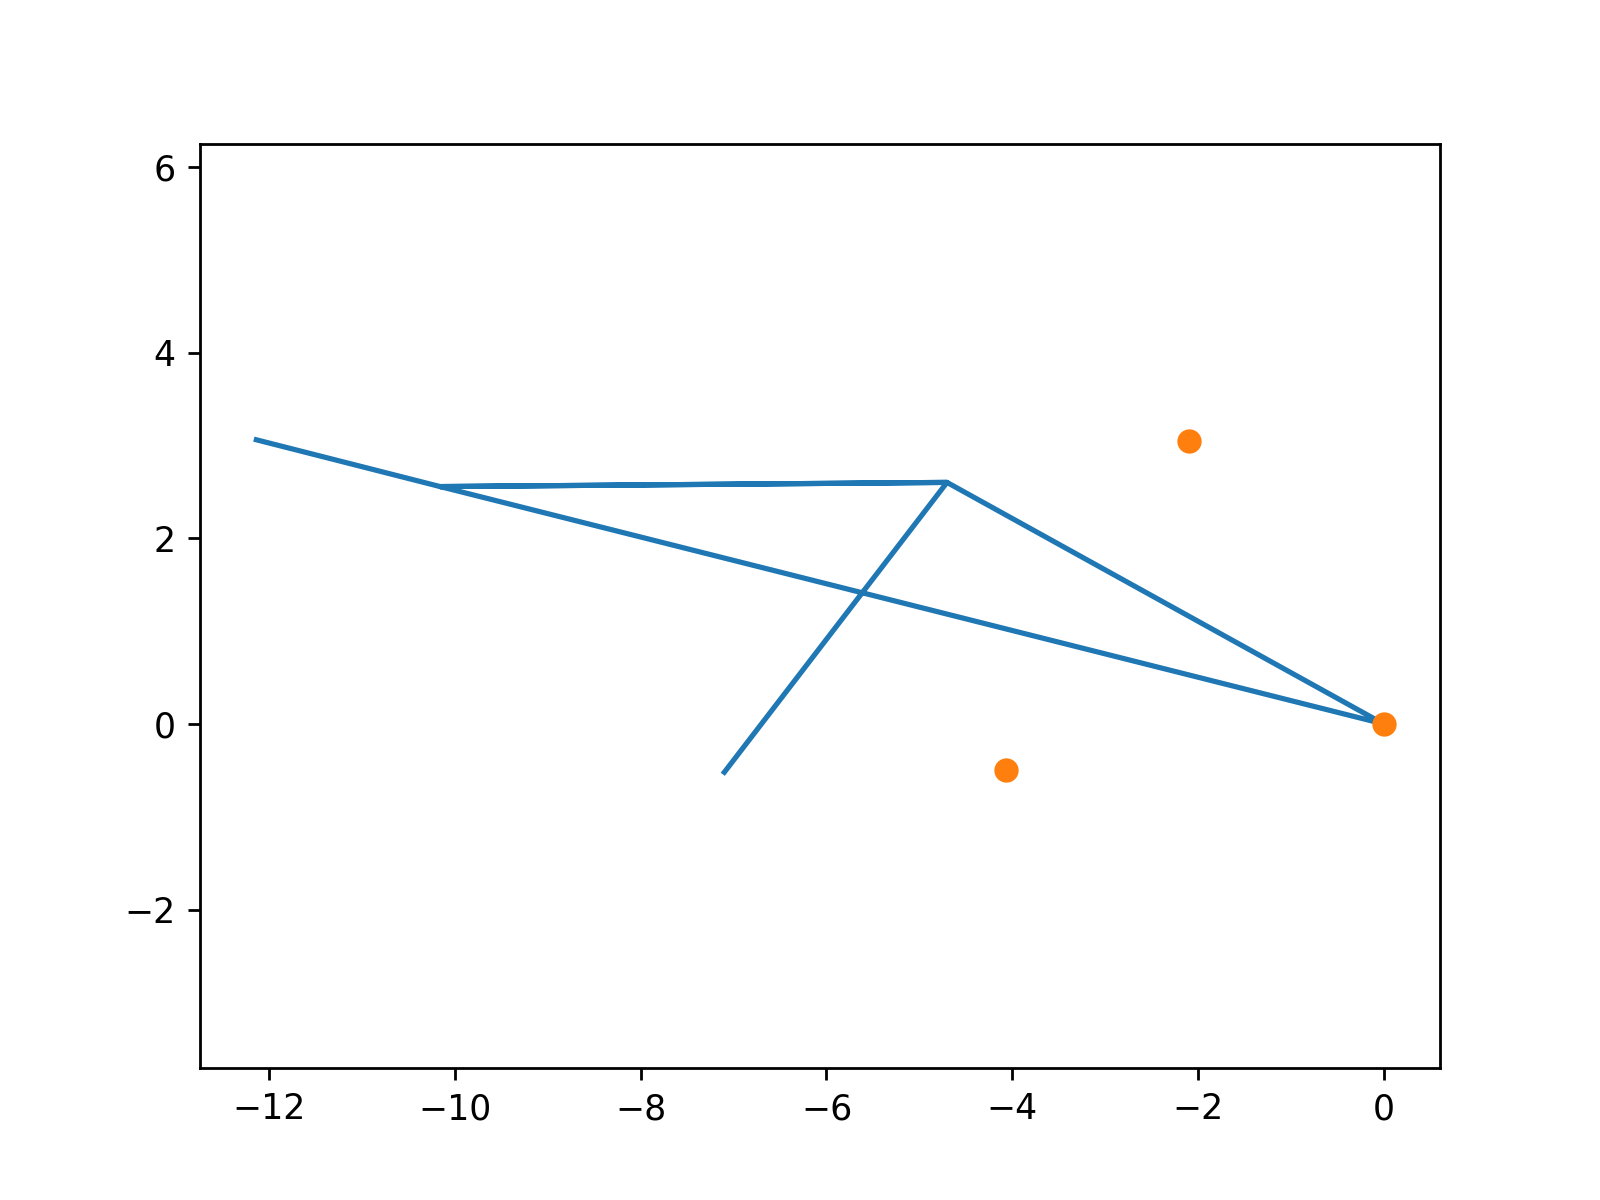

In [2]:
%matplotlib notebook
# this command tells notebook to display plots in the notebook
from math import *
from sympy import *

import matplotlib
import matplotlib.pyplot as plt

d1,t1,d2,t2 = symbols("d1 t1 d2 t2", real=True)
d3,t3,d4,t4 = symbols("d3 t3 d4 t4", real=True)
g2,g3,g4 = symbols("g2 g3 g4", real=True)
s2,s3,s4 = symbols("s2 s3 s4",real=True)

r1 = d1*exp(I*t1)
r2 = d2*exp(I*t2)
r3 = d3*exp(I*t3)
r4 = d4*exp(I*t4)

# set up P's & Q's
c1 = 0+0*I
c2 = -4.07-0.5*I
c3 = -2.10+3.05*I

oa = -12.14+3.06*I
ob = -7.10-0.52*I

pp1 = c1-oa
pp2 = c2-oa
pp3 = c3-oa

qq1 = c1-ob
qq2 = c2-ob
qq3 = c3-ob

# set up deltas
del2 = pp2-pp1
del3 = pp3-pp1

# set the given angles

p2 = radians(131)
p3 = radians(277.5)


# LEFT SIDE #

# now try characteristic polynomial approach
print("Left Char Equation")
detleft = Matrix([[1, 1, pp1], [exp(I*p2),exp(I*g2),pp2],[exp(I*p3),exp(I*g3),pp3]]).det()
print("detleft=",detleft)
print()

#next solve left characteristic equation for g3 and g4
ans = nsolve((re(detleft),im(detleft)), (g2, g3), (radians(10),radians(20)), 
            maxsteps=200, tol=1.0e-6, verify=false)  #, verbose=true )

print("left char solution g2 & g3",degrees(ans[0]),degrees(ans[1]))
print ("abs(left_char)=",abs(detleft.evalf(subs={g2:ans[0],g3:ans[1]}) ))
print()

g2a = ans[0]
g3a = ans[1]

#write out the dyad-standard equations for left side of linkage 
posl2 = r1*(exp(I*p2)-1) + r2*(exp(I*g2a)-1) - del2
posl3 = r1*(exp(I*p3)-1) + r2*(exp(I*g3a)-1) - del3
print("LEFT DYAD EQ.s")
print("posl2=",posl2)
print("posl3=",posl3)
print()

ansl = nsolve((re(posl2),im(posl2),re(posl3),im(posl3)), (d1, t1, d2, t2), (5,radians(10),2 ,radians(-50)), 
            maxsteps=200, tol=1.0e-6, verify=false)

print("left 3pos solution r1,t1,r2,t2 =",ansl[0],degrees(ansl[1]),ansl[2],degrees(ansl[3]))
print ("abs(posl2)=",N(abs(posl2.evalf(subs={d1:ansl[0],t1:ansl[1],d2:ansl[2],t2:ansl[3]}) ),3))
print ("abs(posl3)=",N(abs(posl3.evalf(subs={d1:ansl[0],t1:ansl[1],d2:ansl[2],t2:ansl[3]}) ),3))
print()


# RIGHT SIDE #
# now try characteristic polynomial approach
print("Right Char Equation")
detright = Matrix([[1, 1, qq1], [exp(I*s2),exp(I*g2a),qq2],[exp(I*s3),exp(I*g3a),qq3]]).det()
print("detright=",detright)
print()

#next solve left characteristic equation for g3 and g4
ans = nsolve((re(detright),im(detright)), (s2, s3), (radians(33),radians(42)), 
            maxsteps=200, tol=1.0e-6, verify=false)  #, verbose=true )

print("left char solution s2 & s3",degrees(ans[0]),degrees(ans[1]))
print ("abs(left_char)=",abs(detright.evalf(subs={s2:ans[0],s3:ans[1]}) ))
print()

s2a = ans[0]
s3a = ans[1]

#write out the dyad-standard equations for right side of linkage 
posr2 = r3*(exp(I*s2a)-1) + r4*(exp(I*g2a)-1) - del2
posr3 = r3*(exp(I*s3a)-1) + r4*(exp(I*g3a)-1) - del3

print("posr2=",posr2)
print("posr3=",posr3)
print()

ans = nsolve((re(posr2),im(posr2),re(posr3),im(posr3)), (d3, t3, d4, t4), (1,radians(100), 2 ,radians(50)), 
            maxsteps=200, tol=1.0e-6, verify=false)

print("right 3pos solution  r3,t3,r4,t4 =",ans[0],degrees(ans[1]),ans[2],degrees(ans[3]))
print ("abs(posr2)=",N(abs(posr2.evalf(subs={d3:ans[0],t3:ans[1],d4:ans[2],t4:ans[3]}) ),3))
print ("abs(posr3)=",N(abs(posr3.evalf(subs={d3:ans[0],t3:ans[1],d4:ans[2],t4:ans[3]}) ),3))
print()

evalr1 = N(r1.evalf(subs={d1:ansl[0],t1:ansl[1]}),3)
evalr2 = N(r2.evalf(subs={d2:ansl[2],t2:ansl[3]}),3)
evalr3 = N(r3.evalf(subs={d3:ans[0],t3:ans[1]}),3)
evalr4 = N(r4.evalf(subs={d4:ans[2],t4:ans[3]}),3)
evalr5 = evalr2-evalr4
evalr6 = evalr1+evalr2-evalr4-evalr3


print("phi2 =",degrees(p2),"phi3 =",degrees(p3))
print()
print("pp1 =",pp1,"pp2 =",pp2,"pp3 =",pp3)
print("qq1 =",qq1,"qq2 =",qq2,"qq3 =",qq3)
print("del2 =",N(del2.evalf(),3))
print("del3 =",N(del3.evalf(),3))
print()
#print("phi2 =",degrees(p2a),"phi3 =",degrees(p3a))
print("gamma2 =",degrees(g2a),"gamma3 =",degrees(g3a))      
print("psi2 =",degrees(s2a),"psi3 =",degrees(s3a))
print()

print("R1 = (",evalr1,")  (", abs(evalr1),"@",degrees(arg(evalr1)),"degs)")
print("R2 = (",evalr2,")  (", abs(evalr2),"@",degrees(arg(evalr2)),"degs)")
print("R2 = (",evalr3,")  (", abs(evalr3),"@",degrees(arg(evalr3)),"degs)")
print("R4 = (",evalr4,")  (", abs(evalr4),"@",degrees(arg(evalr4)),"degs)")
print("R5 = (",evalr5,")  (", abs(evalr5),"@",degrees(arg(evalr5)),"degs)")
print("R6 = (",evalr6,")  (", abs(evalr6),"@",degrees(arg(evalr6)),"degs)")
print()

evalOa = oa
evalA = oa+evalr1
evalB = oa+pp1-evalr4
c = oa+pp1
evalOb = ob

print("Oa = (",evalOa,")")
print("A = (",evalA,")")
print("C = (",c,")")
print("B = (",evalB,")")
print("Ob = (",evalOb,")")

# call matplotlib routines for a scatter plot 
fig, ax = plt.subplots()
ax.plot([re(evalOa),re(evalA),re(c),re(evalB),re(evalA),re(evalB),re(evalOb)],
    [im(evalOa),im(evalA),im(c),im(evalB),im(evalA),im(evalB),im(evalOb)],
    [re(oa+pp1),re(oa+pp2),re(oa+pp3)],[im(oa+pp1),im(oa+pp2),im(oa+pp3)],'o',)
ax.set_aspect('equal',adjustable='datalim')
plt.show()

